In [ ]:
import pandas as pd
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/online_raw.csv')
print('Shape dataset:', dataset.shape)
print('\nLima data teratas:\n', dataset.head())
print('\nInformasi dataset:')
print(dataset.info())
print('\nStatistik deskriptif:\n', dataset.describe())


# Melakukan correlasi

In [ ]:
dataset_corr = dataset.corr()
print('Korelasi dataset : \n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())


In [ ]:
dataset_corr = dataset.corr()
print('Korelasi dataset : \n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())
# Tugas praktek
print('Korelasi BounceRates-ExitRates: ',dataset_corr.loc['ExitRates','BounceRates'])
print('Korelasi Revenue-PageValues: ', dataset_corr.loc['Revenue','PageValues'])
print('Korelasi TrafficType-Weekend: ', dataset_corr.loc['TrafficType','Weekend'])



In [ ]:
dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1, 2, 1)
sns.countplot(dataset['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)

# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(dataset['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# visualizing the distribution of customers around the Region
plt.hist(dataset['Region'], color = 'lightblue')
plt.title('Distribution of Customers', fontsize = 20)
plt.xlabel('Region Codes', fontsize = 14)
plt.ylabel('Count Users', fontsize = 14)
plt.show()

In [ ]:
#checking missing value for each feature  
print('Checking missing value for each feature:')
print(dataset.isnull().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(dataset.isnull().sum().sum())

# Melakukan drop terhadap missing data

In [ ]:
dataset_clean = dataset.dropna()
print('dataset yang sudah dibersihkan dari missing value ',dataset_clean.shape )

# cara lain untuk mengatasi missing value dengan cara impute missing value

In [ ]:
# cek data kosong sebelumnya
print(dataset.isnull().sum())

#cek jumlah data kosong 
print(dataset.isnull().sum().sum())

#mengatasi dengan impute missing value
dataset.fillna(dataset.mean(), inplace = True)

# cek data kosong setelah di impute
print(dataset.isnull().sum())

#cek jumlah data kosong setelah di impute 
print(dataset.isnull().sum().sum())




In [ ]:
import pandas as pd
dataset1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')

print("Before imputation:")
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with median of feature value  
dataset1.fillna(dataset.mean(), inplace = True)
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

# Melakukan scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  
#list all the feature that need to be scaled  
scaling_column = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
#Apply fit_transfrom to scale selected feature  
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])
#Cheking min and max value of the scaling_column
print(dataset[scaling_column].describe().T[['min','max']])

# Merubah string menjadi numerik dengan LabelEncoder

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

In [ ]:
# removing the target column Revenue from dataset and assigning to X
X = dataset.drop(['Revenue'], axis = 1)
# assigning the target column Revenue to y
y = dataset['Revenue']
# checking the shapes
print("Shape of X", X.shape)
print("Shape of y", y.shape)

# Melakukan Train dan test

In [ ]:
from sklearn.model_selection import train_test_split
# splitting the X, and y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
# checking the shapes
print("Shape of X_train :", X_train)
print("Shape of y_train :", y_test.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

# Pemanggilan fungsi algoritma decisiontree dari sklearn atau disebut dengan model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Call the classifier
model = DecisionTreeClassifier()
# Fit the classifier to the training data
model = model.fit(X_train, y_train)


# Memprediksi Label dari testing dataset

In [ ]:
# Apply the classifier/model to the test data
y_pred = model.predict(X_test)
print(y_pred.shape)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
#Evaluasi model
print('Training Akurasi', model.score(X_train,y_train))
print('Training Akurasi', model.score(X_test,y_test))

# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train,y_train)
#Training Model: Predict 
y_pred = logreg.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', model.score(X_train, y_train))  
print('Testing Accuracy :', model.score( X_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)
print(cr)

# Melakukan Decision tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Call the classifier
decision_tree = DecisionTreeClassifier()
# Fit the classifier to the training data
decision_tree = decision_tree.fit(X_train, y_train)

# evaluating the decision_tree performance
print('Training Accuracy :', decision_tree.score(X_train,y_train))
print('Testing Accuracy :', decision_tree.score(X_test,y_test))

Model regresi terdiri atas 2 tipe yaitu :

Simple regression model → model regresi paling sederhana, hanya terdiri dari satu feature (univariate) dan 1 target.
Multiple regression model → sesuai namanya, terdiri dari lebih dari satu feature (multivariate).
Adapun model regresi yang paling umum digunakan adalah Linear Regression.

 

“Oke, saya tahu kamu sudah enggak sabar. Sebelumnya kamu membuat modellingnya, saya jelaskan prosedur dan library yang tepat untuk digunakan ya, nanti saya akan email detail intruksinya.”

Aku pun menunggu email dari Senja. Setelah beberapa menit, pesan yang kutunggu akhirnya muncul:

Pisahkan dataset ke dalam Feature dan Label, gunakan fungsi .drop(). Pada dataset ini, label/target adalah variabel MEDV
Checking dan print jumlah data setelah Dataset pisahkan ke dalam Feature dan Label, gunakan .shape()
Bagi dataset ke dalam Training dan test dataset, 70% data digunakan untuk training dan 30% untuk testing, gunakan fungsi train_test_split() , dengan random_state = 0
Checking dan print kembali jumlah data dengan fungsi .shape()
Import LinearRegression dari sklearn.linear_model
Deklarasikan  LinearRegression regressor dengan nama reg
Fit regressor ke training dataset dengan .fit(), dan gunakan .predict() untuk memprediksi nilai dari testing dataset.
“Kalau dibaca aja kelihatannya membingungkan, tapi kalau sudah dicoba pasti bisa, Aksara. Semangat!”

 


In [ ]:
#load dataset
import pandas as pd
housing = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/housing_boston.csv')
#Data rescaling
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])
# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']
# checking the shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# checking the shapes  
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

##import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression
# Call the regressor
reg = LinearRegression()
# Fit the regressor to the training data  
reg = reg.fit(X_train, y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)

Tugas Praktek
"Kalau kamu sudah paham evaluasi performa model regresi, sekaligus kamu coba hitung nilai MSE, MAE, dan RMSE dari linear modelnya, Aksara,” pinta Senja

 

Aku baru mau mengutak-atik kodenya ketika email dari Senja muncul berisi intruksi:

Import library yang digunakan: mean_squared_error, mean_absolute_error dari  sklearn.metrics dan numpy sebagai aliasnya yaitu np. Serta, import juga matplotlib.pyplot sebagai aliasnya, plt.
Hitung dan print nilai MSE dan RMSE dengan menggunakan argumen y_test dan y_pred, untuk rmse gunakan np.sqrt()
Buat scatter plot yang menggambarkan hasil prediksi (y_pred) dan harga actual (y_test)
 

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt 

#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()

K-Means Clustering
"Jadi, Algorithm K-Means itu apa dan bagaimana cara kerjanya?” tanyaku antusias.

 “K-Means merupakan tipe clustering dengan centroid based (titik pusat). Artinya kesamaan dari objek/sampel dihitung dari seberapa dekat objek itu dengan centroid atau titik pusat.”

 

Aku masih penasaran. “Jadi, bagaimana kita mengukur kedekatan objek dan centroid?”

 “Untuk menghitung kedekatan, digunakan perhitungan jarak antar 2 buah data atau jarak Minkowski. Saya share yah rumusnya,” ujar Senja.

Aku menyimak isi rumus yang dibagikan Senja di slide presentasinya:



xi , xj adalah dua buah data yang akan dihitung jaraknya, dan p = dimensi/jumlah dari data

Terdapat beberapa tipe perhitungan jarak yang dapat digunakan, yaitu :

Jarak Manhattan di mana g = 1
Jarak Euclidean di mana g = 2
Jarak Chebychev di mana g = ∞
 “Nja, aku masih bingung, cara menentukan centroid bagaimana caranya?”

 

 “Untuk menentukan centroid, pada awalnya kita perlu mendefinisikan jumlah centroid (K) yang diinginkan, semisalnya kita menetapkan jumlah K = 3; maka pada awal iterasi, algorithm akan secara random menentukan 3 centroid. Setelah itu, objek/sample/data point yang lain akan dikelompokkan sebagai anggota dari salah satu centroid yang terdekat, sehingga terbentuk 3 cluster data. Sampai sini cukup dipahami?”

 

“Yup, boleh lanjut, Nja,” sahutku mempersilakan Senja kembali menjelaskan.

“Iterasi selanjutnya, titik-titik centroid diupdate atau berpindah ke titik yang lain, dan jarak dari data point yang lain ke centroid yang baru dihitung kembali, kemudian dikelompokkan kembali berdasarkan jarak terdekat ke centroid yang baru. Iterasi akan terus berlanjut hingga diperoleh cluster dengan error terkecil, dan posisi centroid tidak lagi berubah.”



“Kamu sudah bisa lihat di layar ya, Aksara. Menurutmu, apakah ada perbedaan prosedur antara unsupervised learning dan supervised learning?”

 

Aku tahu ini pertanyaan untuk menguji pemahamanku.

“Secara prosedur, tahap eksplorasi data untuk memahami karakteristik data, dan tahap preprocessing tetap dilakukan. Tetapi dalam unsupervised learning, kita tidak membagi dataset ke feature dan label; dan juga ke dalam training dan test dataset, karena pada dasarnya kita tidak memiliki informasi mengenai label/target data,” jawabku mantap.

 

“Tampaknya kamu sudah paham. Saatnya kita mulai praktik membuat programnya.”

 

 

Tugas Praktek
“Untuk praktik  ini, kita akan menggunakan dataset ‘Mall Customer Segmentation’,” ujar Senja.
Aku membaca detail latihan yang sudah ia catatkan untukku:

Dataset ini merupakan data customer suatu mall dan berisi basic informasi customer berupa : CustomerID, age, gender, annual income, dan spending score.  Adapun tujuan dari clustering adalah untuk memahami customer - customer mana saja yang sering melakukan transaksi sehingga informasi ini dapat diberikan kepada marketing team untuk membuat strategi promosi yang sesuai dengan karakteristik customer.

 

In [ ]:
#import library
import pandas as pd
from sklearn.cluster import KMeans


#load dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/mall_customers.csv')
#selecting features  
X = dataset[['annual_income','spending_score']]

#Define KMeans as cluster_model  
cluster_model = KMeans(n_clusters = 5, random_state = 24)  
labels = cluster_model.fit_predict(X)



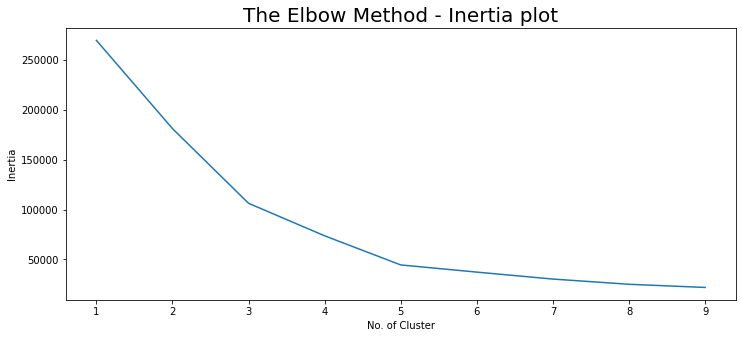

In [67]:
#import library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
	#Assign KMeans as cluster_model
	cluster_model = KMeans(n_clusters = k, random_state = 24)
	#Fit cluster_model to X
	cluster_model.fit(X)
	#Get the inertia value
	inertia_value = cluster_model.inertia_
	#Append the inertia_value to inertia list
	inertia.append(inertia_value)
    
##Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('inertia')
plt.show()

In [ ]:

#import library
import matplotlib.pyplot as plt

#convert dataframe to array
X = X.values
#Separate X to xs and ys --> use for chart axis
xs = X[:,0]
ys = X[:,1]
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = cluster_model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D', s=50)
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

